In [1]:
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
df_data = pd.read_excel("Final Dataset.xlsx")

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df_data.drop('class', axis=1)
y = df_data['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print(pca.n_components_)

18


In [4]:
num_components = pca.n_components_
df_X_pca = pd.DataFrame(data=X_pca, columns=[f"PC{i+1}" for i in range(num_components)])
df_X_pca["class"] = y

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()
df_X_pca['class'] = label_encoder.fit_transform(df_X_pca['class'])

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

# Separate features and target
X = df_X_pca.drop('class', axis=1)
y = df_X_pca['class']


# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True)
}

# Cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Store results
results = {}

for name, model in classifiers.items():
    accuracy = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy').mean()
    precision = cross_val_score(model, X_scaled, y, cv=cv, scoring='precision').mean()
    recall = cross_val_score(model, X_scaled, y, cv=cv, scoring='recall').mean()
    f1 = cross_val_score(model, X_scaled, y, cv=cv, scoring='f1').mean()
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

for model, metrics in results.items():
    print(f"Model: {model}")
    for metric, score in metrics.items():
        print(f"  {metric}: {score:.4f}")
    print()


C:\Users\ROG\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ROG\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

Model: KNN
  Accuracy: 0.9412
  Precision: 0.9171
  Recall: 0.9725
  F1 Score: 0.9434

Model: Naive Bayes
  Accuracy: 0.7137
  Precision: 0.6428
  Recall: 0.9725
  F1 Score: 0.7733

Model: Decision Tree
  Accuracy: 0.9175
  Precision: 0.9180
  Recall: 0.9175
  F1 Score: 0.9207

Model: XGBoost
  Accuracy: 0.9575
  Precision: 0.9540
  Recall: 0.9650
  F1 Score: 0.9581

Model: Logistic Regression
  Accuracy: 0.9037
  Precision: 0.8976
  Recall: 0.9125
  F1 Score: 0.9039

Model: SVM
  Accuracy: 0.9500
  Precision: 0.9340
  Recall: 0.9700
  F1 Score: 0.9510



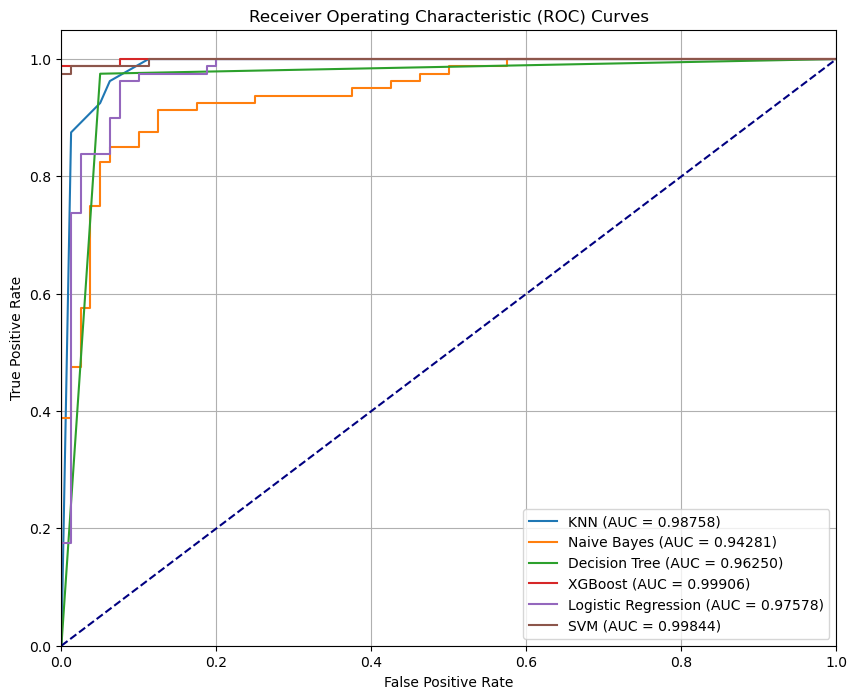

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define classifiers (same as before)
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True)
}

# Plot ROC curve for each classifier
plt.figure(figsize=(10, 8))

for name, model in classifiers.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict probabilities
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.5f})')

# Plot settings
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [18]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Bidirectional
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
df_X_pca['class'] = label_encoder.fit_transform(df_X_pca['class'])

X = df_X_pca.drop('class', axis=1).values
y = df_X_pca['class'].values

#y = to_categorical(y)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
precisions = []
recalls = []
f1_scores = []
roc_auc_scores = []

def create_model1():
    model = Sequential([
        Dense(64, input_dim=18, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_model2():
    model = Sequential([
        Dense(128, input_dim=18, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [65]:
print(to_categorical(y))

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [45]:
data = X.reshape(X.shape[0], X.shape[1], 1)
def create_model3():
    model = Sequential([
        Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(data.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        LSTM(64, return_sequences=True),
        LSTM(32),
        Dense(y.shape[1], activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [73]:
def create_model4():
    input_shape = (data.shape[1], data.shape[2])
    num_classes = to_categorical(y).shape[1]
    model = Sequential([
        Bidirectional(LSTM(64, input_shape=input_shape)),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.build(input_shape=(None, *input_shape))
    return model

Epoch 1/100
16/16 [==============================] - 1s 20ms/step - loss: 0.6781 - accuracy: 0.6309 - val_loss: 0.5987 - val_accuracy: 0.7344
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5294 - accuracy: 0.7988 - val_loss: 0.4923 - val_accuracy: 0.8281
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4352 - accuracy: 0.8848 - val_loss: 0.4152 - val_accuracy: 0.8984
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3608 - accuracy: 0.9141 - val_loss: 0.3595 - val_accuracy: 0.8828
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3037 - accuracy: 0.9297 - val_loss: 0.3112 - val_accuracy: 0.8984
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.2583 - accuracy: 0.9316 - val_loss: 0.2781 - val_accuracy: 0.8984
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.2218 - accuracy: 0.9414 - val_loss: 0.2515 - val_accuracy: 0.9062
Epoch 8/100


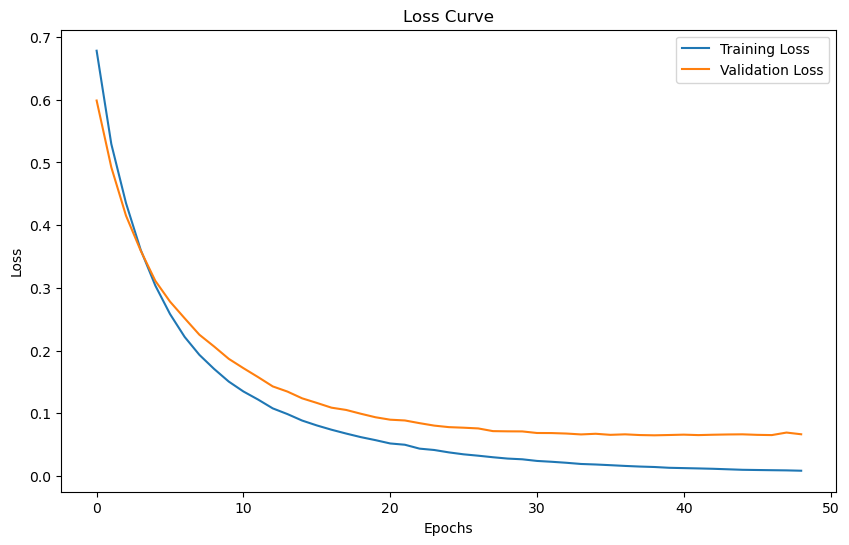

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


# Separate features and target
X = df_X_pca.drop('class', axis=1)
y = df_X_pca['class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the model
def create_model1():
    model = Sequential([
        Dense(64, input_dim=X_train.shape[1], activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize the model
model = create_model1()

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, 
                    callbacks=[early_stopping], verbose=1)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()


Epoch 1/100
16/16 [==============================] - 1s 16ms/step - loss: 0.6470 - accuracy: 0.6270 - val_loss: 0.5750 - val_accuracy: 0.7891
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5149 - accuracy: 0.8066 - val_loss: 0.4427 - val_accuracy: 0.8516
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3898 - accuracy: 0.8633 - val_loss: 0.3391 - val_accuracy: 0.8594
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3010 - accuracy: 0.9023 - val_loss: 0.2681 - val_accuracy: 0.8594
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.2158 - accuracy: 0.9258 - val_loss: 0.2302 - val_accuracy: 0.8594
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.1786 - accuracy: 0.9297 - val_loss: 0.1829 - val_accuracy: 0.9062
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.1482 - accuracy: 0.9492 - val_loss: 0.1625 - val_accuracy: 0.9062
Epoch 8/100


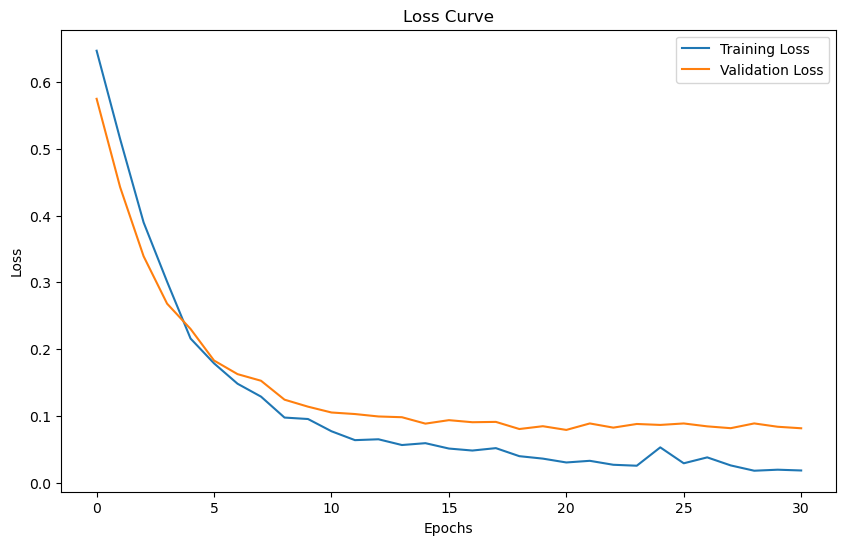

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Assuming df_X_pca is already defined and loaded with your dataset

# Separate features and target
X = df_X_pca.drop('class', axis=1)
y = df_X_pca['class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the model
model = create_model2()

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, 
                    callbacks=[early_stopping], verbose=1)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()


Epoch 1/100
16/16 [==============================] - 5s 79ms/step - loss: 0.6847 - accuracy: 0.5215 - val_loss: 0.6645 - val_accuracy: 0.6016
Epoch 2/100
16/16 [==============================] - 0s 12ms/step - loss: 0.6225 - accuracy: 0.6816 - val_loss: 0.5900 - val_accuracy: 0.6953
Epoch 3/100
16/16 [==============================] - 0s 11ms/step - loss: 0.5105 - accuracy: 0.7695 - val_loss: 0.5398 - val_accuracy: 0.7500
Epoch 4/100
16/16 [==============================] - 0s 11ms/step - loss: 0.4537 - accuracy: 0.7656 - val_loss: 0.4541 - val_accuracy: 0.7500
Epoch 5/100
16/16 [==============================] - 0s 11ms/step - loss: 0.3837 - accuracy: 0.8301 - val_loss: 0.3516 - val_accuracy: 0.8359
Epoch 6/100
16/16 [==============================] - 0s 11ms/step - loss: 0.3080 - accuracy: 0.8809 - val_loss: 0.3133 - val_accuracy: 0.8516
Epoch 7/100
16/16 [==============================] - 0s 11ms/step - loss: 0.2932 - accuracy: 0.8809 - val_loss: 0.3004 - val_accuracy: 0.8594
Epoch 

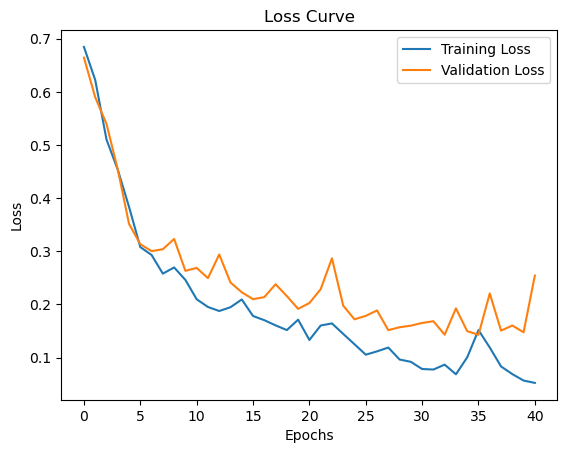

In [25]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Assume df_X_pca is loaded with features and target
# Separate features and target
X = df_X_pca.drop('class', axis=1).values
y = df_X_pca['class'].values

# Reshape data for Conv1D
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
def create_model3():
    model = Sequential([
        Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        LSTM(64, return_sequences=True),
        LSTM(32),
        Dense(1, activation='sigmoid')  # Binary classification output
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Instantiate the model
model = create_model3()

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()


In [72]:
# Create the model

model = create_model4()
model.build(input_shape=(None, *input_shape))

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_20 (Bidirecti  (None, 128)              33792     
 onal)                                                           
                                                                 
 dense_41 (Dense)            (None, 32)                4128      
                                                                 
 dense_42 (Dense)            (None, 2)                 66        
                                                                 
Total params: 37,986
Trainable params: 37,986
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Visualize model architecture
import pydot
from tensorflow.keras.utils import plot_model
#plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [29]:
#plot_model(create_model1(), to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [30]:
#plot_model(create_model2(), to_file='model_plot2.png', show_shapes=True, show_layer_names=True)

5/5 [==============================] - 1s 2ms/step


C:\Users\ROG\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ROG\anaconda3\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Average Accuracy: 0.8660714285714286
Average Precision: 0.8721421831606783
Average Recall: 0.8666666666666667
Average F1 Score: 0.866060577203355
Average ROC-AUC Score: nan


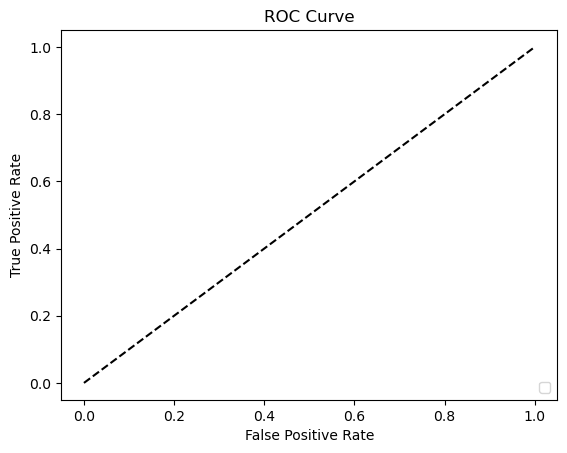

In [54]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
for train_idx, test_idx in kfold.split(data, y):
    X_train, X_test = data[train_idx], data[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    model = create_model4(()
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)
    #accuracy_scores.append(accuracy_score(y_test, y_pred))
    #precisions.append(precision_score(y_test, y_pred))
    #recalls.append(recall_score(y_test, y_pred))
    #f1_scores.append(f1_score(y_test, y_pred))
    accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
    precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
    recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
    f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
    accuracy_scores.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    #fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    #roc_auc = auc(fpr, tpr)
    #roc_auc_scores.append(roc_auc)
    #plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)


print("Average Accuracy:", np.mean(accuracy_scores))
print("Average Precision:", np.mean(precisions))
print("Average Recall:", np.mean(recalls))
print("Average F1 Score:", np.mean(f1_scores))
print("Average ROC-AUC Score:", np.mean(roc_auc_scores))

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
train_temp_df, test_temp_df = train_test_split(df_X_pca, test_size=0.2, random_state=42)
test_df, validation_df = train_test_split(test_temp_df, test_size=0.5, random_state=42)

In [27]:
import os
import shutil

def create_folder_if_not_exists(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    else:
        print(f"Folder '{folder_path}' already exists.")

def delete_folder(folder_path):
    if folder_path != ".ipynb_checkpoints":
        shutil.rmtree(folder_path)
        #print(f"Folder '{folder_path}' and its contents have been deleted.")


def get_all_folders(directory):
    folders = [folder for folder in os.listdir(directory) if os.path.isdir(os.path.join(directory, folder))]
    return folders


In [28]:
def set_up_for_applying(num_splits):
    list_folder = get_all_folders(os.getcwd())
    for i in list_folder:
        delete_folder(i)
    df_parts = np.array_split(train_temp_df.sample(frac=1), num_splits)
    for i in range(num_splits):
        new_df =df_parts[i].reset_index(drop=True)
        subset_file_path = f'Client{i}/Dataset.xlsx'
        create_folder_if_not_exists(f'Client{i}')
        new_df.to_excel(subset_file_path, index=False)

In [29]:
from Crypto.Random import get_random_bytes
from Crypto.PublicKey import RSA
from tensorflow.keras.models import save_model, load_model
from Crypto.Cipher import PKCS1_OAEP, AES
from sklearn.model_selection import train_test_split

def load_model_from_file(file_path):
    model = load_model(file_path)
    return model

def encrypt_file(input_filename, output_filename, public_key):
    nonce = get_random_bytes(16)
    symmetric_key = os.urandom(16)

    cipher_rsa = PKCS1_OAEP.new(public_key)
    encrypted_symmetric_key = cipher_rsa.encrypt(symmetric_key)
    cipher_aes = AES.new(symmetric_key, AES.MODE_EAX, nonce=nonce)

    with open(input_filename, 'rb') as file:
        plaintext_data = file.read()

    encrypted_data, tag = cipher_aes.encrypt_and_digest(plaintext_data)

    with open(output_filename, 'wb') as encrypted_file:
        encrypted_file.write(nonce)
        encrypted_file.write(encrypted_symmetric_key)
        encrypted_file.write(tag)
        encrypted_file.write(encrypted_data)

def decrypt_file(input_filename, output_filename, private_key):
    with open(input_filename, 'rb') as encrypted_file:
        nonce = encrypted_file.read(16)
        encrypted_symmetric_key = encrypted_file.read(private_key.size_in_bytes())
        tag = encrypted_file.read(16)
        encrypted_data = encrypted_file.read()

    cipher_rsa = PKCS1_OAEP.new(private_key)
    symmetric_key = cipher_rsa.decrypt(encrypted_symmetric_key)
    cipher_aes = AES.new(symmetric_key, AES.MODE_EAX, nonce=nonce)
    decrypted_data = cipher_aes.decrypt_and_verify(encrypted_data, tag)
    
    with open(output_filename, 'wb') as decrypted_file:
        decrypted_file.write(decrypted_data)

In [30]:
def read_private_key(clientNo):
    key_path = "Client"+ str(clientNo)
    file_path = key_path + "/rsa.pvt"
    with open(file_path, 'rb') as pvt_file:
        pvt_key = RSA.import_key(pvt_file.read())
        return pvt_key

def read_public_key(clientNo):
    key_path = "Client"+ str(clientNo)
    file_path = key_path + "/rsa.pub"
    with open(file_path, 'rb') as pub_file:
        pub_key = RSA.import_key(pub_file.read())
        return pub_key

In [31]:
def serverProgram(number_of_clients, num_iteration):
    private_key_list = []
    public_key_list = []
    weights_list = []
    acc_list = []
    isFirst = True
    validation_X = validation_df.drop('class', axis=1).values
    validation_X = validation_X.reshape(validation_X.shape[0], validation_X.shape[1], 1)
    validation_Y = validation_df['class'].values
    validation_Y = to_categorical(validation_Y)
    testing_X = test_df.drop('class', axis=1).values
    testing_X = testing_X.reshape(testing_X.shape[0], testing_X.shape[1], 1)
    testing_Y = test_df['class'].values
    testing_Y = to_categorical(testing_Y)
    for i in range(number_of_clients):
        private_key = RSA.generate(1024)
        public_key = private_key.publickey()
        folder_name = f"Client{i}"
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)

        public_key_path = folder_name + "/rsa.pub"
        private_key_path = folder_name + "/rsa.pvt"
        private_key_list.append(private_key)
        public_key_list.append(public_key)
        with open(public_key_path, "wb") as pub_file:
            pub_file.write(public_key.exportKey())
            pub_file.close()
        with open(private_key_path, "wb") as pvt_file:
            pvt_file.write(private_key.exportKey())
            pvt_file.close()

    for i in range(num_iteration):
        weights_in_iteration = []
        weights_of_model = []
        for j in range(number_of_clients):
            print(f"------Client{j}------")
            path_model = f"Client{j}/encrypted.h5"
            encrypt_file("original_model.h5", path_model, public_key_list[j])
            #loss, accuracy = clientProgram(j, isFirst)
            clientProgram(j, isFirst)
            
            path_decryption = f"Client{j}/decrypted.h5"
            decrypt_file(path_model, path_decryption, private_key_list[j])
            model = load_model_from_file(path_decryption)
            loss, accuracy = model.evaluate(validation_X, validation_Y)
            weights_in_iteration.append(accuracy)
            weights_of_model.append(model.get_weights())
            
        weights_list.append(weights_in_iteration)
        average_weight_list = np.mean(weights_list, axis=0)
        average_weight_list /= np.sum(average_weight_list)

        final_weight_list = weights_of_model[0]
        for m1 in range(len(final_weight_list)):
            for m2 in range(len(final_weight_list[m1])):
                final_weight_list[m1][m2] = 0.0

        for j in range(len(weights_of_model)):
            for m1 in range(len(weights_of_model[j])):
                for m2 in range(len(weights_of_model[j][m1])):
                    final_weight_list[m1][m2] += weights_of_model[j][m1][m2]*average_weight_list[j]

        new_model = create_model1()
        new_model.set_weights(final_weight_list)
        loss, accuracy = new_model.evaluate(testing_X, testing_Y)
        print(f"Iteration {i}: Accuracy={accuracy}")
        new_model.save('original_model.h5')
        isFirst = False
        acc_list.append(accuracy)
        if i==num_iteration-1:
            return acc_list

In [32]:
def clientProgram(client_no, isFirst):
    private_key = read_private_key(client_no)
    public_key = read_public_key(client_no)
    encrypted_model_file = f"Client{client_no}/encrypted.h5"
    decrypted_model_file = f"Client{client_no}/decrypted.h5"
    decrypt_file(encrypted_model_file, decrypted_model_file, private_key)
    model = load_model_from_file(decrypted_model_file)
    file_name = f"Client{client_no}/Dataset.xlsx"     
    df = pd.read_excel(file_name)
    X = df.drop('class', axis=1).values
    y = df['class'].values
    y = to_categorical(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    #if not isFirst:
    #    loss, accuracy = model.evaluate(X_test, y_test)
    #    print("Previous Loss: "+ str(loss))
    #    print("Previous Accuracy: "+ str(accuracy))
    model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))
    #loss, accuracy = model.evaluate(X_test, y_test)
    save_model(model, decrypted_model_file)
    encrypt_file(decrypted_model_file, encrypted_model_file, public_key)
    #return loss, accuracy

In [74]:
num_client = 12
num_iteration = 8
save_model(create_model2(), 'original_model.h5')
set_up_for_applying(num_client)
acc = serverProgram(num_client, num_iteration)

C:\Users\ROG\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


------Client0------
Epoch 1/5
2/2 [==============================] - 3s 708ms/step - loss: 0.6856 - accuracy: 0.5439 - val_loss: 0.6549 - val_accuracy: 0.7143
Epoch 2/5
2/2 [==============================] - 0s 47ms/step - loss: 0.6530 - accuracy: 0.7018 - val_loss: 0.5957 - val_accuracy: 0.8571
Epoch 3/5
2/2 [==============================] - 0s 47ms/step - loss: 0.6228 - accuracy: 0.8070 - val_loss: 0.5451 - val_accuracy: 0.8571
Epoch 4/5
2/2 [==============================] - 0s 47ms/step - loss: 0.5965 - accuracy: 0.8070 - val_loss: 0.4962 - val_accuracy: 0.8571
Epoch 5/5
3/3 [==============================] - 1s 8ms/step - loss: 0.5946 - accuracy: 0.6375
------Client1------
Epoch 1/5
2/2 [==============================] - 2s 660ms/step - loss: 0.6869 - accuracy: 0.5614 - val_loss: 0.6157 - val_accuracy: 0.8571
Epoch 2/5
2/2 [==============================] - 0s 47ms/step - loss: 0.6442 - accuracy: 0.7018 - val_loss: 0.5739 - val_accuracy: 0.8571
Epoch 3/5
2/2 [====================

In [15]:
print(acc)

[0.5, 0.6499999761581421, 0.699999988079071, 0.6499999761581421, 0.737500011920929, 0.7749999761581421, 0.699999988079071, 0.7875000238418579, 0.737500011920929, 0.75, 0.75, 0.699999988079071, 0.699999988079071, 0.737500011920929, 0.737500011920929]


In [145]:
for train_idx, test_idx in kfold.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    model = load_model_from_file("original_model.h5")
    _, accuracy = model.evaluate(X_test, y_test, verbose=2)
    accuracy_scores.append(accuracy)

print("Average Accuracy:", np.mean(accuracy_scores))

5/5 - 0s - loss: 0.3634 - accuracy: 0.8687 - 110ms/epoch - 22ms/step
5/5 - 0s - loss: 0.3416 - accuracy: 0.8875 - 94ms/epoch - 19ms/step
5/5 - 0s - loss: 0.3436 - accuracy: 0.8687 - 110ms/epoch - 22ms/step
5/5 - 0s - loss: 0.3325 - accuracy: 0.8813 - 94ms/epoch - 19ms/step
5/5 - 0s - loss: 0.3187 - accuracy: 0.9125 - 94ms/epoch - 19ms/step
Average Accuracy: 0.9193749904632569
